Slumpmässig kommun: 
Kommunen Dals-Ed har id 1438 och har som senast totalt 4480 människor som bodde i kommunen. Snittåldern är 48 år, samt hade år 2017 en befolkningstäthet på: 7 människor/km^2. Det bor 667 utrikesfödda i kommunen.
Ekerö 341.180794416061 sek/capita 134.0
Knivsta 217.67038049190666 sek/capita 71.4
Markaryd 1604.9564813859956 sek/capita 19.7
Borgholm 1535.2518786264625 sek/capita 16.0
Svalöv 362.49065693430657 sek/capita 37.4
Malmö 1404.4706590225687 sek/capita 2277.0
Dals-Ed 1416.325669642857 sek/capita 6.4
Karlsborg 1629.9025504938818 sek/capita 17.4
Gullspång 1450.1848942598187 sek/capita 16.5
Bengtsfors 1444.6974543816175 sek/capita 10.5
Åmål 1796.252666609779 sek/capita 25.4
Skara 1400.2462699077955 sek/capita 43.8
Munkfors 1539.7876480541456 sek/capita 26.1
Grums 1788.6227848101266 sek/capita 23.6
Filipstad 1470.7698090207232 sek/capita 6.7
Fagersta 1808.439471407221 sek/capita 49.6
Orsa 1444.5954381752701 sek/capita 4.0
Ockelbo 1616.6730288976098 sek/capita 5.5
K

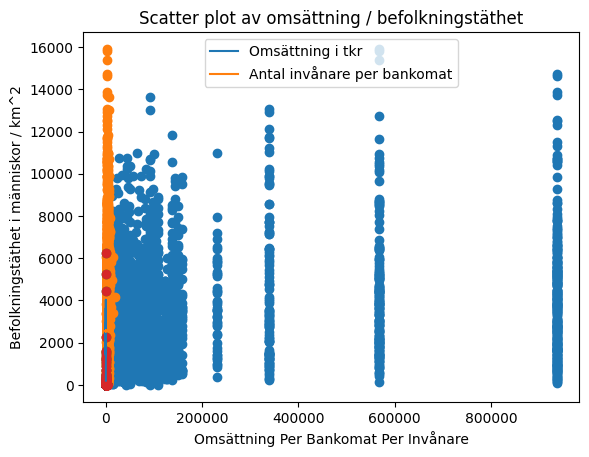

In [1]:
##Pandas data frame
import pandas as pd
from random import randint
from data_parsing import DataParser
data = DataParser()
data.laddaKommuner()
print("Slumpmässig kommun: ")
print(data.kommuner[randint(0, 289)])

data.laddaBankomater()
from analysis_models import AnalysModeller

analyser = AnalysModeller(data)
analyser.slumpmässigBankomatOmsättning()
analyser.scatterPlotOmsättningPerInvånare()
analyser.scatterPlotOmsättningPerInvånarePerBankomat()
analyser.scatterPlotOmsättningPerInvånareMotBefolkningstäthet()
analyser.scatterPlotOmsättningPerAutomatMotBefolkningstäthet()

In [4]:
from collections import defaultdict
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

month = "2022M01"
year = int(month[0:4])

dataDict = defaultdict(dict)

for kommun in data.kommuner:
    try:
        namn = kommun.namn
        befolkning = kommun.data[month]["total"]
        totalOmsättning = kommun.totalOmsättning
        omsättningPerInvånare = kommun.omsättningPerInvånare
        antalBankomater = kommun.antalBankomater
        befolkningstäthet = kommun.befolkningstätheter[year]
        snittÅlder = kommun.snittÅlder
        antalTransaktioner = kommun.totalTransaktionsAntal
        antalTransaktionerPerBankomat = kommun.snittTransaktionsAntal
        genomsnittligTransaktionsStorlek = kommun.totalOmsättning / kommun.totalTransaktionsAntal 
        antalInvånarePerBankomat = befolkning / kommun.antalBankomater
        utrikesFödda = kommun.utrikesfödda[year]
        andelUtrikesfödda = utrikesFödda / befolkning
    except: 
        pass
    try:
        dataDict[namn] = {
            "Befolkning": befolkning,
            "Total Omsättning": totalOmsättning,
            "Omsättning per Invånare": omsättningPerInvånare,
            "Antal Bankomater": antalBankomater,
            "Befolknigstäthet": befolkningstäthet,
            "Genomsnittlig Ålder": snittÅlder,
            "Antal Transaktioner": antalTransaktioner,
            "Antal Transaktioner Per Bankomat": antalTransaktionerPerBankomat,
            "Genomsnittlig Transaktionsstorlek": genomsnittligTransaktionsStorlek,
            "Antal Invånare Per Bankomat": antalInvånarePerBankomat,
            "Utrikesfödda": utrikesFödda,
            "Andel utrikesfödda": andelUtrikesfödda,
        }
    except: pass

df = pd.DataFrame(dataDict)
print(df)


                                   Upplands Väsby    Vallentuna     Österåker  \
Befolkning                           4.550600e+04  3.266600e+04  4.587400e+04   
Total Omsättning                     8.569685e+07  3.421275e+07  4.596429e+07   
Omsättning per Invånare              0.000000e+00  5.139673e+02  4.926082e+02   
Antal Bankomater                     1.100000e+01  4.000000e+00  7.000000e+00   
Befolknigstäthet                     1.200000e+00  9.740000e+01  1.573000e+02   
Genomsnittlig Ålder                  4.500000e+01  4.200000e+01  4.300000e+01   
Antal Transaktioner                  2.031200e+04  1.421800e+04  1.785500e+04   
Antal Transaktioner Per Bankomat     1.846545e+03  3.554500e+03  2.550714e+03   
Genomsnittlig Transaktionsstorlek    2.145973e+03  2.406298e+03  2.574309e+03   
Antal Invånare Per Bankomat          1.960091e+03  8.166500e+03  6.553429e+03   
Utrikesfödda                         2.995000e+03  5.673000e+03  8.695000e+03   
Andel utrikesfödda          

In [10]:
addresser = [bankomat.geographicalData["address"] for bankomat in data.bankomater]
kommuner = [kommun.namn for kommun in data.kommuner]

positionDataframe = pd.DataFrame([addresser, kommuner]).T
print(positionDataframe)

                      0               1
0         Kungsgatan 44  Upplands Väsby
1     Drottninggatan 61      Vallentuna
2          Storgatan 25       Österåker
3     Drottninggatan 55          Värmdö
4     Drottninggatan 55        Järfälla
...                 ...             ...
2781        Kisavägen 2            None
2782  Adelswärdsgatan 1            None
2783        Torggatan 1            None
2784        Torggatan 1            None
2785       Klubbgatan 3            None

[2786 rows x 2 columns]
